<a href="https://colab.research.google.com/github/AliArabi55/transfer-learning-FE---FT/blob/main/transfer_learning_FE_%26_FT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import numpy as np

# Load VGG16 model
model = VGG16(weights='imagenet')

# Generate random data to simulate prediction (just to decode labels)
dummy_data = np.random.random((1, 224, 224, 3))

# Get predictions
preds = model.predict(dummy_data)

# Decode predictions
decoded_predictions = decode_predictions(preds, top=1000)  # Get top 1000 classes

# Print all known classes from ImageNet
class_labels = [class_info[1] for class_info in decoded_predictions[0]]
print(class_labels)


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 157s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
['mosquito_net', 'toilet_tissue', 'envelope', 'shower_curtain', 'tray', 'toilet_seat', 'Band_Aid', 'water_snake', 'Petri_dish', 'photocopier', 'electric_fan', 'ballpoint', 'paper_towel', 'binder', 'carton', 'dough', 'wall_clock', 'wing', 'cockroach', 'handkerchief', 'dishwasher', 'refrigerator', 'book_jacket', 'bathtub', 'black_widow', 'iPod', 'washbasin', 'washer', 'tub', 'spatula', 'Samoyed', 'laptop', 'modem', 'fire_screen', 'crib', 'vault', 'measuring_cup', 'tick', 'plunger', 'stingray', 'syringe', 'whiskey_jug', 'rule', 'sandbar', 'radiator', 'lotion', 'switch', 'soap_dispenser', 'jersey', 'vase', 'Maltese_dog', 'wooden_spoon', 'nipple', 'cleaver', 'centipede', 'mixing_bowl', 'ladle', 'ringneck_snake', 'rubber_eraser', 'pill_bottle', 'axolotl', 'hamper', 'hand_blower', 'plastic_bag', 'West_Highland_white_terrier', 'bath_towel', 'menu', 'shower_

In [ ]:
import json
from tensorflow.keras.utils import get_file

# Download the ImageNet class index
CLASS_INDEX_PATH = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
class_index_file = get_file('imagenet_class_index.json', CLASS_INDEX_PATH)

# Load the class index file
with open(class_index_file) as f:
    class_index = json.load(f)

# Print all known classes
for class_id, class_info in class_index.items():
    print(f"Class ID: {class_id}, Label: {class_info[1]}")

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
Class ID: 0, Label: tench
Class ID: 1, Label: goldfish
Class ID: 2, Label: great_white_shark
Class ID: 3, Label: tiger_shark
Class ID: 4, Label: hammerhead
Class ID: 5, Label: electric_ray
Class ID: 6, Label: stingray
Class ID: 7, Label: cock
Class ID: 8, Label: hen
Class ID: 9, Label: ostrich
Class ID: 10, Label: brambling
Class ID: 11, Label: goldfinch
Class ID: 12, Label: house_finch
Class ID: 13, Label: junco
Class ID: 14, Label: indigo_bunting
Class ID: 15, Label: robin
Class ID: 16, Label: bulbul
Class ID: 17, Label: jay
Class ID: 18, Label: magpie
Class ID: 19, Label: chickadee
Class ID: 20, Label: water_ouzel
Class ID: 21, Label: kite
Class ID: 22, Label: bald_eagle
Class ID: 23, Label: vulture
Class ID: 24, Label: great_grey_owl
Class ID: 25, Label: European_fire_salamander
Class ID: 26, Label: common_newt
Class ID: 27, Label: eft
Class ID: 28, Label: spotted_salamander
Class ID: 29, Label: axolotl
Class ID: 30, Label: bullfrog
Clas

In [ ]:
# Import required libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class1_data = 'datasets\\cats'
class2_data = 'datasets\\dogs'
main_dataset= 'datasets'
# Function to verify images in a folder
def verify_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            try:
                img = Image.open(os.path.join(folder_path, filename))  # Try to open the image
                img.verify()  # Check if the image is valid
            except (IOError, SyntaxError) as e:
                print(f"Image {filename} is corrupted or invalid.")

# Verify images in the dataset folders
verify_images(class1_data)
verify_images(class2_data)

# Load the pre-trained VGG16 model without the top layers (classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers so they don't get trained
for layer in base_model.layers:
    layer.trainable = False

# Add new layers for the specific task
x = Flatten()(base_model.output)  # Flatten the output from the base model
x = Dense(128, activation='relu')(x)  # Add a new fully connected layer (NEW ANN)
x = Dense(2, activation='softmax')(x)  # Add the classification layer (2 categories: cats and dogs)

# Build the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model with the chosen optimizer, loss function, and metrics
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Prepare the data using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    main_dataset ,  # Provide the path to your training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model on the new data
model.fit(train_generator, epochs=10, steps_per_epoch=100)

# Function to classify a new image
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Pass the image through the trained model
    prediction = model.predict(img_array)

    # Show the classification result
    if prediction[0][0] > prediction[0][1]:
        print("It's a cat!")
    else:
        print("It's a dog!")

# Display a single image using PIL
def display_image_pil(img_path):
    img = Image.open(img_path)
    img.show()

# Display a single image using Matplotlib
def display_image_matplotlib(img_path):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,338 (68.38 MB)

 Trainable params: 3,211,650 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 8 images belonging to 2 classes.
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 222us/step - accuracy: 0.5000 - loss: 0.6136
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 141us/step - accuracy: 0.5000 - loss: 7.7902
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 242us/step - accuracy: 0.5000 - loss: 1.3479
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 141us/step - accuracy: 1.0000 - loss: 0.0012
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 202us/step - accuracy: 0.8750 - loss: 0.3794
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 141us/step - accuracy: 0.5000 - loss: 0.8565
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 141us/step - accuracy: 1.0000 - loss: 0.0520
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 141us/step - accuracy: 1.0000 - loss: 9.8569e-04
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 172us/step - accuracy: 1.0000 - loss: 2.9056e-05
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 157us/step - accuracy: 1.0000 - loss: 2.4289e-06


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step
It's a dog!


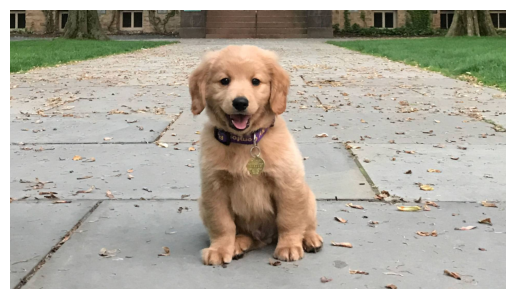

In [ ]:
img_path="C:\\Users\\Baraa\\1.jpg" # Replace with your image path

classify_image(img_path)
display_image_matplotlib(img_path)

# End Task 1

# Start Task 2

In [ ]:
# Import required libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to verify images in a folder
def verify_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            try:
                img = Image.open(os.path.join(folder_path, filename))  # Try to open the image
                img.verify()  # Check if the image is valid
            except (IOError, SyntaxError) as e:
                print(f"Image {filename} is corrupted or invalid.")

# Verify images in the dataset folders
verify_images('C:\\Users\\Baraa\\datasets\\cats')
verify_images('C:\\Users\\Baraa\\datasets\\dogs')

# Load the pre-trained VGG16 model without the top layers (classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers initially (so they don't get trained in the first phase)
for layer in base_model.layers:
    layer.trainable = False

# Add new layers for the specific task
x = Flatten()(base_model.output)  # Flatten the output from the base model
x = Dense(128, activation='relu')(x)  # Add a new fully connected layer
x = Dense(2, activation='softmax')(x)  # Add the classification layer (2 categories: cats and dogs)

# Build the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model for the first phase of training (with frozen layers)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Prepare the data using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\Baraa\\datasets',  # Provide the path to your training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model on the new data (with frozen layers)
model.fit(train_generator, epochs=5, steps_per_epoch=100)

# Fine-tuning phase: Unfreeze some layers of the base model
for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers for fine-tuning
    layer.trainable = True

# Compile the model again with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model again (this time with some unfrozen layers)
model.fit(train_generator, epochs=5, steps_per_epoch=100)

# Function to classify a new image
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Pass the image through the trained model
    prediction = model.predict(img_array)

    # Show the classification result
    if prediction[0][0] > prediction[0][1]:
        print("It's a cat!")
    else:
        print("It's a dog!")

# Display a single image using PIL
def display_image_pil(img_path):
    img = Image.open(img_path)
    img.show()

# Display a single image using Matplotlib
def display_image_matplotlib(img_path):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()




Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,338 (68.38 MB)

 Trainable params: 3,211,650 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 8 images belonging to 2 classes.
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 192us/step - accuracy: 0.3750 - loss: 0.7717
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 192us/step - accuracy: 1.0000 - loss: 3.7060e-04
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 222us/step - accuracy: 1.0000 - loss: 2.0862e-06
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 162us/step - accuracy: 1.0000 - loss: 5.9605e-08
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 166us/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 233us/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 162us/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 162us/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 252us/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 263us/step - accuracy: 1.0000 - loss: 0.0000e+00


ملخص:
أول شيء، تأكدنا من الصور باستخدام دالة للتحقق.-
حملنا نموذج VGG16 المدرب مسبقاً بدون الطبقات الأخيرة.-
جمّدنا الطبقات الأصلية لحفظ الميزات اللي تعلمها النموذج.-
أضفنا طبقات جديدة تتناسب مع مهمتنا الجديدة (تصنيف القطط والكلاب).-
درّبنا النموذج باستخدام البيانات.-
فكينا تجميد بعض الطبقات وعملنا Fine-Tuning للمزيد من التكيف.-
أخيراً، صنفنا صورة جديدة وعرضناها باستخدام PIL وMatplotlib.-

## ملخص:

1. **التحقق من الصور**:  
   أول شيء، تأكدنا من الصور باستخدام دالة للتحقق.

2. **تحميل النموذج**:  
   حملنا نموذج **VGG16** المدرب مسبقاً بدون الطبقات الأخيرة.

3. **تجميد الطبقات**:  
   جمّدنا الطبقات الأصلية لحفظ الميزات اللي تعلمها النموذج.

4. **إضافة طبقات جديدة**:  
   أضفنا طبقات جديدة تتناسب مع مهمتنا الجديدة (تصنيف القطط والكلاب).

5. **تدريب النموذج**:  
   درّبنا النموذج باستخدام البيانات.

6. **Fine-Tuning**:  
   فكينا تجميد بعض الطبقات وعملنا **Fine-Tuning** للمزيد من التكيف.

7. **تصنيف وعرض صورة جديدة**:  
   أخيراً، صنفنا صورة جديدة وعرضناها باستخدام **PIL** و**Matplotlib**.

---

## Summary:

1. **Image Verification**:  
   First, we verified the images using a verification function.

2. **Loading the Pre-Trained Model**:  
   We loaded the pre-trained **VGG16** model without the top classification layers.

3. **Freezing the Layers**:  
   We froze the original layers to preserve the features learned by the model.

4. **Adding Custom Layers**:  
   We added new layers suited for our specific task (classifying cats and dogs).

5. **Training the Model**:  
   We trained the model using the new dataset.

6. **Fine-Tuning**:  
   We unfroze some layers and performed **Fine-Tuning** to adapt the model further.

7. **Classifying and Displaying a New Image**:  
   Finally, we classified a new image and displayed it using **PIL** and **Matplotlib**.

---

If you have any additional questions or need further clarification or modification to the code, feel free to ask!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
It's a dog!


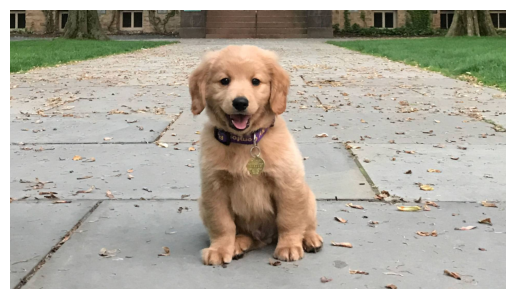

In [ ]:
img_path="C:\\Users\\Baraa\\1.jpg" # Replace with your image path

classify_image(img_path)
display_image_matplotlib(img_path)

In [ ]:
class1_data = 'datasets\\cats'
class2_data = 'datasets\\dogs'
main_dataset= 'datasets'
# Function to verify images in a folder
def verify_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            try:
                img = Image.open(os.path.join(folder_path, filename))  # Try to open the image
                img.verify()  # Check if the image is valid
            except (IOError, SyntaxError) as e:
                print(f"Image {filename} is corrupted or invalid.")

# Verify images in the dataset folders
verify_images(class1_data)
verify_images(class2_data)